# Estimación de calorías basados en áreas segmentadas


In [ ]:
#!pip install easydev
#!pip install colormap
#!pip install extcolors

In [124]:
import pandas as pd
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import extcolors
from colormap import rgb2hex

# Base de Conocimiento

In [125]:
color_keys = pd.read_csv('colors_keys.csv')
color_keys

,c_code,Nombre
0,#C0C0C0,Gris Claro
1,#808080,Gris
2,#000000,Negro
3,#FF0000,Rojo
4,#808080,Marrón
5,#FFFF00,Amarillo
6,#808000,Dorado
7,#00FF00,Verde limón
8,#008000,Verde
9,#00FFFF,Cyan


In [127]:
KB = pd.read_csv('knowledge_base.csv')
KB

,Clase,gramos_por_cm_cuad,kcal_por_gramo
0,plato,0.0,0.00
1,fondo,0.0,0.00
2,huevo,1.7,1.55
3,papa,2.1,0.86
4,espinaca,0.5,0.23


# Carga la imagen que deseamos estimar (Máscara segmentada)

In [128]:
IMAGE_PATH = str(input("Escribe el numero del platillo segmentado: "))
IMAGE_PATH = 'Segmented_Dishes/Segmented_dish' + IMAGE_PATH + '.png'

Escribe el numero del platillo segmentado: 2


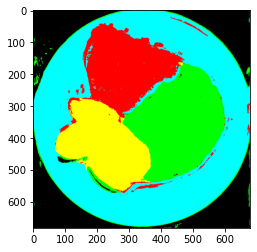

In [129]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)
height, width, channels = img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [130]:
dish_diameter = input("Introduce el diámetro del plato: ")
Box_area = int(dish_diameter)*int(dish_diameter)
Pixel_area = Box_area / (height*width)
Pixel_area

Introduce el diámetro del plato: 26


0.0014555163207303418

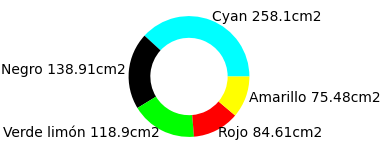

In [131]:
colors_x = extcolors.extract_from_path(IMAGE_PATH, tolerance=0, limit=15)
colors_x

def color_to_df(input):
    colors_pre_list = str(input).replace('([(','')#.split(', (')#[0:-1]
    colors_pre_list = str(colors_pre_list).replace(']','').split(', (')
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color

df_color2 = pd.merge(df_color, color_keys, on=['c_code'], how='left')

list_color = list(df_color2['Nombre'])
list_color2 = list(df_color2['c_code'])
list_percent = [int(i) for i in list(df_color2['occurence'])]
text_c = [c + ' ' + str(round(Pixel_area*int(p),2)) +'cm2' for c, p in zip(list_color,
                                                                               list_percent)]
fig, ax = plt.subplots(figsize=(20,20),dpi=10)
wedges, text = ax.pie(list_percent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color2,
                      textprops={'fontsize': 100, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

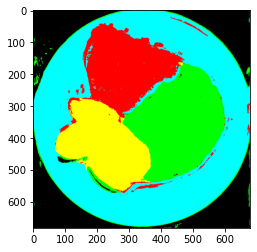

In [132]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)
height, width, channels = img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [133]:
list_food = []
for i in list_color:
    list_food.append(input("Que alimento representa el color " + i + ":"))

Que alimento representa el color Cyan:plato
Que alimento representa el color Negro:fondo
Que alimento representa el color Verde limón:espinaca
Que alimento representa el color Rojo:huevo
Que alimento representa el color Amarillo:papa


In [136]:
list_area = []
for i in list_percent:
    list_area.append(i * Pixel_area)

In [137]:
Results = pd.DataFrame(list(zip(list_area, list_food)),
               columns =['Area', 'Clase'])
Results

,Area,Clase
0,258.102343,plato
1,138.910111,fondo
2,118.899673,espinaca
3,84.607708,huevo
4,75.480165,papa


In [106]:
Results2 = pd.merge(Results,KB,on=['Clase'], how='left')
Results2

,Area,Clase,gramos_por_cm_cuad,kcal_por_gramo
0,258.102343,plato,0.0,0.00
1,138.910111,fondo,0.0,0.00
2,118.899673,espinaca,0.5,0.23
3,84.607708,huevo,1.7,1.55
4,75.480165,papa,2.1,0.86


In [113]:
Results2['Gramos'] = Results2['Area'] * Results2['gramos_por_cm_cuad']
Results2['Calorias'] = Results2['Area'] * Results2['gramos_por_cm_cuad'] * Results2['kcal_por_gramo']

Results2

,Area,Clase,gramos_por_cm_cuad,kcal_por_gramo,Calorias,Gramos
0,258.102343,plato,0.0,0.00,0.000000,0.000000
1,138.910111,fondo,0.0,0.00,0.000000,0.000000
2,118.899673,espinaca,0.5,0.23,13.673462,59.449836
3,84.607708,huevo,1.7,1.55,222.941311,143.833104
4,75.480165,papa,2.1,0.86,136.317179,158.508347


In [111]:
Calorias_Totales = Results2['Calorias'].sum(axis=0)

In [112]:
Calorias_Totales

372.9319521315993